In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhoogla/unswnb15")

df=pd.read_parquet(path)
df.head()


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,180363632.0,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,881000000.0,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,854400000.0,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,600000000.0,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,850400000.0,...,0,0,2,1,0,0,0,0,Normal,0


In [5]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.0/155.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [ ]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Sort correlations with the 'label' column
if 'label' in correlation_matrix:
    print(correlation_matrix['label'].sort_values(ascending=False))
else:
    print("The 'label' column is not numeric or is missing in the correlation matrix.")



label                1.000000
ct_dst_sport_ltm     0.371672
rate                 0.335883
ct_src_dport_ltm     0.318518
sload                0.165249
dur                  0.029096
sbytes               0.019376
trans_depth          0.002246
sloss                0.001828
ackdat               0.000817
is_ftp_login        -0.008762
ct_ftp_cmd          -0.009092
ct_flw_http_mthd    -0.012237
sjit                -0.016436
response_body_len   -0.018930
tcprtt              -0.024668
smean               -0.028372
dinpkt              -0.030136
spkts               -0.043040
synack              -0.043250
djit                -0.048819
dbytes              -0.060403
dloss               -0.075961
dpkts               -0.097394
sinpkt              -0.155454
is_sm_ips_ports     -0.160126
dtcpb               -0.263543
stcpb               -0.266585
dmean               -0.295173
dwin                -0.339166
dload               -0.352169
swin                -0.364877
Name: label, dtype: float64


## stage 0 and 1

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_recall_fscore_support,
    precision_recall_curve, average_precision_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

class NetworkIntrusionModelComparator:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {
            "Decision Tree": DecisionTreeClassifier(random_state=random_state),
            "Random Forest": RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                random_state=random_state
            ),
            "Neural Network": None
        }
        self.encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        self.scaler = StandardScaler()
        self.results = {}
        self.X_train = self.X_test = self.y_train = self.y_test = None

        # Configure logging
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )

    def _is_numeric_column(self, series):
        """Check if a column is numeric by attempting conversion to float."""
        try:
            pd.to_numeric(series, errors='raise')
            return True
        except (ValueError, TypeError):
            return False

    def preprocess_data(self, data, target_col="label", attack_cat_col="attack_cat", test_size=0.2):
        """
        Preprocess the network traffic data with enhanced error handling and validation.

        Parameters:
        -----------
        data : pandas.DataFrame
            Input dataset containing network traffic features
        target_col : str
            Name of the target column (default: "label")
        attack_cat_col : str
            Name of the attack category column to be dropped (default: "attack_cat")
        test_size : float
            Proportion of dataset to include in the test split (default: 0.2)

        Returns:
        --------
        tuple
            Processed (X_train, X_test, y_train, y_test)
        """
        logging.info("Starting data preprocessing...")

        # Input validation
        if not isinstance(data, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame")

        required_cols = [target_col, attack_cat_col]
        missing_cols = [col for col in required_cols if col not in data.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")

        df = data.copy()

        # Handle infinite values
        df = df.replace([np.inf, -np.inf], np.nan)

        # Split features and target
        y = df[target_col]
        X = df.drop([target_col, attack_cat_col], axis=1)

        # Identify column types
        self.categorical_cols = [col for col in X.columns
                               if not self._is_numeric_column(X[col])]
        self.numerical_cols = [col for col in X.columns
                             if col not in self.categorical_cols]

        logging.info(f"Found {len(self.categorical_cols)} categorical and {len(self.numerical_cols)} numerical columns")

        # Enhanced missing value handling with logging
        for col in self.categorical_cols:
            missing = X[col].isna().sum()
            if missing > 0:
                mode_val = X[col].mode()[0]
                X[col].fillna(mode_val, inplace=True)
                logging.info(f"Filled {missing} missing values in {col} with mode: {mode_val}")

        for col in self.numerical_cols:
            missing = X[col].isna().sum()
            if missing > 0:
                median_val = X[col].median()
                X[col].fillna(median_val, inplace=True)
                logging.info(f"Filled {missing} missing values in {col} with median: {median_val}")

        # Feature processing
        if self.categorical_cols:
            X[self.categorical_cols] = X[self.categorical_cols].astype(str)
            encoded = pd.DataFrame(
                self.encoder.fit_transform(X[self.categorical_cols]),
                columns=self.encoder.get_feature_names_out(self.categorical_cols)
            )
            X = X.drop(self.categorical_cols, axis=1)
            X = pd.concat([X, encoded], axis=1)

        if self.numerical_cols:
            X[self.numerical_cols] = self.scaler.fit_transform(X[self.numerical_cols])

        # Train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_state, stratify=y
        )

        logging.info(f"Final preprocessed shape: {X.shape}")
        logging.info(f"Train set size: {len(self.X_train)}, Test set size: {len(self.X_test)}")

        return self.X_train, self.X_test, self.y_train, self.y_test

    def _build_neural_network(self, input_shape):
        """
        Build neural network with improved architecture and regularization.
        """
        model = Sequential([
            Dense(128, activation='relu', input_shape=(input_shape,)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC']
        )
        return model

    def train_models(self, cv_folds=5):
        """
        Train all models with cross-validation and early stopping for neural network.
        """
        for name, model in self.models.items():
            logging.info(f"Training {name}...")

            if name == "Neural Network":
                nn_model = self._build_neural_network(self.X_train.shape[1])
                early_stopping = EarlyStopping(
                    monitor='val_loss',
                    patience=3,
                    restore_best_weights=True
                )

                history = nn_model.fit(
                    self.X_train, self.y_train,
                    validation_data=(self.X_test, self.y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1
                )

                self.models[name] = nn_model
                self.results[name] = {
                    "model": nn_model,
                    "history": history,
                    "y_pred": (nn_model.predict(self.X_test) > 0.5).astype(int)
                }
            else:
                # Cross-validation for sklearn models
                cv_scores = cross_val_score(
                    model, self.X_train, self.y_train,
                    cv=cv_folds, scoring='accuracy'
                )
                logging.info(f"{name} CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

                model.fit(self.X_train, self.y_train)
                y_pred = model.predict(self.X_test)

                self.results[name] = {
                    "model": model,
                    "y_pred": y_pred,
                    "cv_scores": cv_scores
                }

        return self

    def evaluate_models(self):
        """
        Generate comprehensive evaluation metrics for all models.
        """
        metrics = {}
        for name, result in self.results.items():
            y_pred = result["y_pred"]

            # Basic metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                self.y_test, y_pred, average="binary"
            )

            # Confusion matrix metrics
            cm = confusion_matrix(self.y_test, y_pred)
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp)

            metrics[name] = {
                "precision": precision,
                "recall": recall,
                "f1": f1,
                "specificity": specificity,
                "accuracy": (tp + tn) / (tp + tn + fp + fn)
            }

            # AUC-ROC and AUC-PR for models with predict_proba
            if hasattr(result["model"], "predict_proba"):
                y_proba = result["model"].predict_proba(self.X_test)[:, 1]
                metrics[name].update({
                    "auc_roc": roc_auc_score(self.y_test, y_proba),
                    "auc_pr": average_precision_score(self.y_test, y_proba)
                })
            elif name == "Neural Network":
                y_proba = result["model"].predict(self.X_test)
                metrics[name].update({
                    "auc_roc": roc_auc_score(self.y_test, y_proba),
                    "auc_pr": average_precision_score(self.y_test, y_proba)
                })

            # Add cross-validation scores if available
            if "cv_scores" in result:
                metrics[name]["cv_accuracy_mean"] = result["cv_scores"].mean()
                metrics[name]["cv_accuracy_std"] = result["cv_scores"].std()

        return pd.DataFrame(metrics).T

    def plot_roc_curves(self):
        """Plot ROC curves with enhanced visualization."""
        plt.figure(figsize=(10, 6))

        for name, result in self.results.items():
            if hasattr(result["model"], "predict_proba"):
                y_proba = result["model"].predict_proba(self.X_test)[:, 1]
            elif name == "Neural Network":
                y_proba = result["model"].predict(self.X_test)
            else:
                continue

            fpr, tpr, _ = roc_curve(self.y_test, y_proba)
            auc = roc_auc_score(self.y_test, y_proba)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curves Comparison")
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        return plt

    def plot_precision_recall_curves(self):
        """Plot precision-recall curves for all models."""
        plt.figure(figsize=(10, 6))

        for name, result in self.results.items():
            if hasattr(result["model"], "predict_proba"):
                y_proba = result["model"].predict_proba(self.X_test)[:, 1]
            elif name == "Neural Network":
                y_proba = result["model"].predict(self.X_test)
            else:
                continue

            precision, recall, _ = precision_recall_curve(self.y_test, y_proba)
            ap = average_precision_score(self.y_test, y_proba)
            plt.plot(recall, precision, label=f"{name} (AP = {ap:.3f})")

        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("Precision-Recall Curves")
        plt.legend(loc="lower left")
        plt.grid(True, alpha=0.3)
        return plt

    def plot_confusion_matrices(self):
        """Plot confusion matrices with improved visualization."""
        n_models = len(self.models)
        fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 5))
        if n_models == 1:
            axes = [axes]

        for ax, (name, result) in zip(axes, self.results.items()):
            cm = confusion_matrix(self.y_test, result["y_pred"])
            sns.heatmap(
                cm,
                annot=True,
                fmt='d',
                ax=ax,
                cmap='Blues',
                cbar=False
            )
            ax.set_title(f"{name}\nAccuracy: {(cm[0,0] + cm[1,1])/cm.sum():.3f}")
            ax.set_xlabel("Predicted")
            ax.set_ylabel("Actual")

        plt.tight_layout()
        return plt

    def plot_learning_curves(self):
        """Plot learning curves for the neural network with metrics."""
        if "Neural Network" not in self.results:
            logging.warning("No neural network results available")
            return None

        history = self.results["Neural Network"]["history"]
        metrics = history.history.keys()

        n_metrics = len(metrics) // 2  # Divide by 2 for train/val pairs
        fig, axes = plt.subplots(1, n_metrics, figsize=(6*n_metrics, 5))
        if n_metrics == 1:
            axes = [axes]

        for i, metric in enumerate([m for m in metrics if not m.startswith('val_')]):
            axes[i].plot(history.history[metric], label=f'Train {metric}')
            axes[i].plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
            axes[i].set_title(f"Neural Network {metric.capitalize()}")
            axes[i].set_xlabel("Epoch")
            axes[i].set_ylabel(metric.capitalize())
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)

        plt.tight_layout()
        return plt
    #GAN##########################

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sdv.metadata import SingleTableMetadata
    from sdv.single_table import CTGANSynthesizer
    from sklearn.preprocessing import StandardScaler
    import scipy.stats as stats

    def generate_synthetic_data_ctgan(original_data, target_column, num_synthetic_samples):
        """
        Generate synthetic data using CTGAN

        Parameters:
        -----------
        original_data : pandas.DataFrame
            Original dataset
        target_column : str
            Name of the target/label column
        num_synthetic_samples : int
            Number of synthetic samples to generate

        Returns:
        --------
        synthetic_data : pandas.DataFrame
            Synthetic dataset with same structure as original
        """
        # Separate features and target
        X = original_data.drop(columns=[target_column])
        y = original_data[target_column]

        # Fit CTGAN
        ctgan = CTGANSynthesizer(epochs=50)
        ctgan.fit(X)

        # Generate synthetic samples
        synthetic_X = ctgan.sample(num_synthetic_samples)

        # Add original labels to synthetic data (optional strategy)
        synthetic_y = y.sample(num_synthetic_samples, replace=True).reset_index(drop=True)

        synthetic_data = pd.concat([synthetic_X, synthetic_y], axis=1)

        return synthetic_data

    def plot_distribution_comparison(original_data, synthetic_data, columns=None):
        """
        Plot distribution comparison between original and synthetic data

        Parameters:
        -----------
        original_data : pandas.DataFrame
            Original dataset
        synthetic_data : pandas.DataFrame
            Synthetic dataset
        columns : list, optional
            Columns to plot. If None, plot first 5 numeric columns.
        """
        if columns is None:
            columns = original_data.select_dtypes(include=[np.number]).columns[:5]

        plt.figure(figsize=(15, 3*len(columns)))

        for i, col in enumerate(columns, 1):
            plt.subplot(len(columns), 2, 2*i-1)
            original_data[col].hist(alpha=0.5, label='Original')
            synthetic_data[col].hist(alpha=0.5, label='Synthetic')
            plt.title(f'{col} Distribution')
            plt.legend()

            # T-test subplot
            plt.subplot(len(columns), 2, 2*i)
            t_stat, p_val = stats.ttest_ind(original_data[col], synthetic_data[col])
            plt.text(0.5, 0.5,
                     f't-statistic: {t_stat:.4f}\np-value: {p_val:.4f}',
                     horizontalalignment='center',
                     verticalalignment='center')
            plt.axis('off')

        plt.tight_layout()
        return plt

    def main_synthetic_data_workflow(df, target_column='label', num_synthetic_samples=None):
        """
        Complete synthetic data workflow with error handling and type conversion
        """
        # Convert category columns to object type
        data = df.copy()
        for col in data.columns:
            if data[col].dtype.name == 'category':
                data[col] = data[col].astype('object')

        # Set default sample count
        if num_synthetic_samples is None:
            num_synthetic_samples = len(data)

        # Generate synthetic data
        synthetic_df = generate_synthetic_data_ctgan(
            data,
            target_column,
            num_synthetic_samples=num_synthetic_samples
        )

        # Plot comparisons
        plot_distribution_comparison(data, synthetic_df).show()

        # Class distribution analysis
        original_dist = data[target_column].value_counts(normalize=True)
        synthetic_dist = synthetic_df[target_column].value_counts(normalize=True)

        print("Original Class Distribution:")
        print(original_dist)
        print("\nSynthetic Class Distribution:")
        print(synthetic_dist)

        return {
            'synthetic_data': synthetic_df,
            'original_dist': original_dist,
            'synthetic_dist': synthetic_dist
        }

    # Usage in model comparator workflow
    def integrate_synthetic_data(df, model_comparator):
        """
        Full integration with model training workflow
        """
        # Preprocess original data first to get transformers
        X_train, X_test, y_train, y_test = model_comparator.preprocess_data(df)

        # Generate synthetic data
        synthetic_result = main_synthetic_data_workflow(
            df=df,
            target_column='label',
            num_synthetic_samples=len(X_train)  # Match training set size
        )
        synthetic_df = synthetic_result['synthetic_data']

        # Process synthetic data using original preprocessing
        synthetic_X = synthetic_df.drop(columns=['label'])
        synthetic_y = synthetic_df['label']

        # Apply categorical encoding
        if model_comparator.categorical_cols:
            synthetic_cat = synthetic_X[model_comparator.categorical_cols].astype(str)
            encoded = pd.DataFrame(
                model_comparator.encoder.transform(synthetic_cat),
                columns=model_comparator.encoder.get_feature_names_out(model_comparator.categorical_cols)
            )
            synthetic_X = synthetic_X.drop(model_comparator.categorical_cols, axis=1)
            synthetic_X = pd.concat([synthetic_X, encoded], axis=1)

        # Apply numerical scaling
        if model_comparator.numerical_cols:
            synthetic_X[model_comparator.numerical_cols] = model_comparator.scaler.transform(
                synthetic_X[model_comparator.numerical_cols]
            )

        # Train models
        model_comparator.X_train = synthetic_X
        model_comparator.y_train = synthetic_y
        model_comparator.train_models()

        return model_comparator.evaluate_models()
    def generate_synthetic_data_ctgan(original_data, target_column, num_synthetic_samples):
        """
        Generate synthetic data using CTGAN with metadata specification
        """
        # Preprocess categorical columns
        categorical_cols = original_data.select_dtypes(include=['category']).columns
        original_data = original_data.copy()
        original_data[categorical_cols] = original_data[categorical_cols].astype('object')

        # Separate features and target
        X = original_data.drop(columns=[target_column])
        y = original_data[target_column]

        # Create metadata
        metadata = SingleTableMetadata()
        metadata.detect_from_dataframe(X)

        # Configure CTGAN with metadata
        ctgan = CTGANSynthesizer(
            metadata=metadata,
            epochs=50,
            verbose=True
        )

        # Fit to data
        ctgan.fit(X)

        # Generate synthetic samples
        synthetic_X = ctgan.sample(num_synthetic_samples)

        # Add original labels
        synthetic_y = y.sample(num_synthetic_samples, replace=True).reset_index(drop=True)

        synthetic_data = pd.concat([synthetic_X, synthetic_y], axis=1)

        return synthetic_data

    # Dependencies to install:
    # pip install ctgan pandas scikit-learn matplotlib scipy

In [7]:

import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import logging

class Oversampling:
    def __init__(self, random_state=42, log_level=logging.INFO):
        """
        Initialize Oversampling with logging configuration.

        Parameters:
        -----------
        random_state : int, default=42
            Random state for reproducibility
        log_level : int, default=logging.INFO
            Logging level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
        """
        self.random_state = random_state
        np.random.seed(random_state)

        # Configure logging
        self.logger = logging.getLogger(__name__)
        self.logger.setLevel(log_level)

        # Create console handler if none exists
        if not self.logger.handlers:
            ch = logging.StreamHandler()
            ch.setLevel(log_level)
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            ch.setFormatter(formatter)
            self.logger.addHandler(ch)

    def _get_neighbors(self, X, k):
        """Find k-nearest neighbors for all samples."""
        self.logger.debug(f"Finding {k} nearest neighbors for {X.shape[0]} samples")

        neigh = NearestNeighbors(n_neighbors=k + 1)
        neigh.fit(X)
        distances, indices = neigh.kneighbors(X)

        self.logger.debug("Nearest neighbors search completed")
        return distances[:, 1:], indices[:, 1:]

    def smote(self, X, y, k=5, sampling_strategy=1.0):
        """Implementation of SMOTE with logging."""
        self.logger.info("Starting SMOTE oversampling")
        self.logger.info(f"Parameters: k={k}, sampling_strategy={sampling_strategy}")

        X = np.array(X)
        y = np.array(y)

        # Log initial class distribution
        counter = Counter(y)
        self.logger.info(f"Initial class distribution: {dict(counter)}")

        majority_class = max(counter, key=counter.get)
        minority_class = min(counter, key=counter.get)

        minority_indices = np.where(y == minority_class)[0]
        X_minority = X[minority_indices]

        n_minority = counter[minority_class]
        n_majority = counter[majority_class]
        n_synthetic = int(n_majority * sampling_strategy) - n_minority

        self.logger.info(f"Need to generate {n_synthetic} synthetic samples")

        if n_synthetic <= 0:
            self.logger.warning("No synthetic samples needed. Check sampling_strategy parameter.")
            return X, y

        _, nn_indices = self._get_neighbors(X_minority, k)

        # Generate synthetic samples
        synthetic_samples = []
        num_samples = n_synthetic

        self.logger.info("Generating synthetic samples...")
        generation_progress = 0
        progress_step = max(n_synthetic // 10, 1)  # Log every 10% or each sample if < 10

        while num_samples > 0:
            for i in range(len(X_minority)):
                if num_samples <= 0:
                    break

                nn_idx = np.random.choice(nn_indices[i])
                diff = X_minority[nn_idx] - X_minority[i]
                gap = np.random.random()
                synthetic_sample = X_minority[i] + gap * diff

                synthetic_samples.append(synthetic_sample)
                num_samples -= 1

                # Log progress
                if len(synthetic_samples) - generation_progress >= progress_step:
                    generation_progress = len(synthetic_samples)
                    self.logger.info(f"Generated {generation_progress}/{n_synthetic} synthetic samples")

        if len(synthetic_samples) > 0:
            X_resampled = np.vstack([X, synthetic_samples])
            y_resampled = np.hstack([y, np.array([minority_class] * len(synthetic_samples))])

            # Log final class distribution
            final_counter = Counter(y_resampled)
            self.logger.info(f"Final class distribution: {dict(final_counter)}")
        else:
            self.logger.warning("No synthetic samples were generated")
            X_resampled, y_resampled = X, y

        self.logger.info("SMOTE oversampling completed")
        return X_resampled, y_resampled

    def adasyn(self, X, y, k=5, beta=1.0):
        """Implementation of ADASYN with logging."""
        self.logger.info("Starting ADASYN oversampling")
        self.logger.info(f"Parameters: k={k}, beta={beta}")

        X = np.array(X)
        y = np.array(y)

        # Log initial class distribution
        counter = Counter(y)
        self.logger.info(f"Initial class distribution: {dict(counter)}")

        majority_class = max(counter, key=counter.get)
        minority_class = min(counter, key=counter.get)

        minority_indices = np.where(y == minority_class)[0]
        X_minority = X[minority_indices]

        n_minority = counter[minority_class]
        n_majority = counter[majority_class]
        n_synthetic = int((n_majority - n_minority) * beta)

        self.logger.info(f"Need to generate {n_synthetic} synthetic samples")

        if n_synthetic <= 0:
            self.logger.warning("No synthetic samples needed. Check beta parameter.")
            return X, y

        _, nn_indices = self._get_neighbors(X_minority, k)

        # Calculate density ratio
        self.logger.debug("Calculating density ratios")
        density_ratio = []
        for i in range(len(X_minority)):
            nn_labels = y[nn_indices[i]]
            ratio = np.sum(nn_labels != minority_class) / k
            density_ratio.append(ratio)

        density_ratio = np.array(density_ratio)
        density_ratio = density_ratio / np.sum(density_ratio)

        # Generate synthetic samples
        self.logger.info("Generating synthetic samples...")
        synthetic_samples = []
        n_samples_per_instance = np.round(density_ratio * n_synthetic).astype(int)

        generation_progress = 0
        total_samples = n_samples_per_instance.sum()
        progress_step = max(total_samples // 10, 1)

        for i, n_samples in enumerate(n_samples_per_instance):
            if n_samples == 0:
                continue

            for _ in range(n_samples):
                nn_idx = np.random.choice(nn_indices[i])
                diff = X_minority[nn_idx] - X_minority[i]
                gap = np.random.random()
                synthetic_sample = X_minority[i] + gap * diff

                synthetic_samples.append(synthetic_sample)

                # Log progress
                if len(synthetic_samples) - generation_progress >= progress_step:
                    generation_progress = len(synthetic_samples)
                    self.logger.info(f"Generated {generation_progress}/{total_samples} synthetic samples")

        if len(synthetic_samples) > 0:
            X_resampled = np.vstack([X, synthetic_samples])
            y_resampled = np.hstack([y, np.array([minority_class] * len(synthetic_samples))])

            # Log final class distribution
            final_counter = Counter(y_resampled)
            self.logger.info(f"Final class distribution: {dict(final_counter)}")
        else:
            self.logger.warning("No synthetic samples were generated")
            X_resampled, y_resampled = X, y

        self.logger.info("ADASYN oversampling completed")
        return X_resampled, y_resampled

    def plot_class_distribution(self, y_original, y_resampled, title="Class Distribution"):
        """Plot class distribution before and after oversampling."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Original distribution
        original_counter = Counter(y_original)
        ax1.bar(original_counter.keys(), original_counter.values())
        ax1.set_title("Original Class Distribution")
        ax1.set_xlabel("Class")
        ax1.set_ylabel("Count")

        # Resampled distribution
        resampled_counter = Counter(y_resampled)
        ax2.bar(resampled_counter.keys(), resampled_counter.values())
        ax2.set_title("Resampled Class Distribution")
        ax2.set_xlabel("Class")
        ax2.set_ylabel("Count")

        plt.suptitle(title)
        plt.tight_layout()
        return plt

    def plot_learning_curves(self, histories, labels):
        """Plot learning curves for multiple models."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        for history, label in zip(histories, labels):
            ax1.plot(history.history['loss'], label=f'{label} - Train')
            ax1.plot(history.history['val_loss'], label=f'{label} - Validation')
        ax1.set_title('Loss Curves')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)

        for history, label in zip(histories, labels):
            ax2.plot(history.history['accuracy'], label=f'{label} - Train')
            ax2.plot(history.history['val_accuracy'], label=f'{label} - Validation')
        ax2.set_title('Accuracy Curves')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        return plt

    def evaluate_and_plot_metrics(self, y_true, y_pred_dict, title="Model Performance Comparison"):
        """Plot performance metrics for multiple models."""
        metrics = {}

        for model_name, y_pred in y_pred_dict.items():
            precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
            acc = accuracy_score(y_true, y_pred)

            metrics[model_name] = {
                'Accuracy': acc,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            }

        # Convert to DataFrame for easier plotting
        metrics_df = pd.DataFrame(metrics).T

        # Plot metrics
        fig, ax = plt.subplots(figsize=(10, 6))
        metrics_df.plot(kind='bar', ax=ax)
        plt.title(title)
        plt.xlabel('Model')
        plt.ylabel('Score')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        return plt, metrics_df

2025-01-31 22:16:18,237 - INFO - Starting data preprocessing...
2025-01-31 22:16:18,331 - INFO - Found 3 categorical and 31 numerical columns
2025-01-31 22:16:20,003 - INFO - Final preprocessed shape: (257673, 188)
2025-01-31 22:16:20,003 - INFO - Train set size: 206138, Test set size: 51535
2025-01-31 22:16:20,115 - __main__ - INFO - Starting SMOTE oversampling
2025-01-31 22:16:20,115 - INFO - Starting SMOTE oversampling
2025-01-31 22:16:20,116 - __main__ - INFO - Parameters: k=5, sampling_strategy=1.0
2025-01-31 22:16:20,116 - INFO - Parameters: k=5, sampling_strategy=1.0
2025-01-31 22:16:20,392 - __main__ - INFO - Initial class distribution: {np.int8(1): 131738, np.int8(0): 74400}
2025-01-31 22:16:20,392 - INFO - Initial class distribution: {np.int8(1): 131738, np.int8(0): 74400}
2025-01-31 22:16:20,495 - __main__ - INFO - Need to generate 57338 synthetic samples
2025-01-31 22:16:20,495 - INFO - Need to generate 57338 synthetic samples
2025-01-31 22:17:14,212 - __main__ - INFO - Gen

Epoch 1/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.9532 - accuracy: 0.8774 - loss: 0.2419 - val_AUC: 0.9755 - val_accuracy: 0.9034 - val_loss: 0.1774
Epoch 2/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.9746 - accuracy: 0.9019 - loss: 0.1770 - val_AUC: 0.9785 - val_accuracy: 0.9038 - val_loss: 0.1662
Epoch 3/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - AUC: 0.9764 - accuracy: 0.9055 - loss: 0.1714 - val_AUC: 0.9793 - val_accuracy: 0.9103 - val_loss: 0.1618
Epoch 4/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - AUC: 0.9776 - accuracy: 0.9076 - loss: 0.1666 - val_AUC: 0.9798 - val_accuracy: 0.9109 - val_loss: 0.1591
Epoch 5/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - AUC: 0.9778 - accuracy: 0.9078 - loss: 0.1663 - val_AUC: 0.9808 - val_accuracy: 0.9131 - val_loss: 0.1559
Epoch 6/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - AUC: 0.9790 - accuracy: 0.9107 - loss: 0.1622 - val_AUC: 0.9802 - val_accuracy: 0.9144 - val_loss: 0.1598
Epoch 7/50
6442/6442 ━

2025-01-31 22:25:08,256 - INFO - Training Decision Tree...
2025-01-31 22:26:06,532 - INFO - Decision Tree CV Accuracy: 0.936 (+/- 0.024)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

2025-01-31 22:26:20,886 - INFO - Training Random Forest...
2025-01-31 22:30:11,824 - INFO - Random Forest CV Accuracy: 0.930 (+/- 0.007)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

2025-01-31 22:31:07,024 - INFO - Training Neural Network...
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
8234/8234 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.9577 - accuracy: 0.8707 - loss: 0.2422 - val_AUC: 0.9777 - val_accuracy: 0.8935 - val_loss: 0.1772
Epoch 2/50
8234/8234 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.9759 - accuracy: 0.9036 - loss: 0.1815 - val_AUC: 0.9794 - val_accuracy: 0.8968 - val_loss: 0.1708
Epoch 3/50
8234/8234 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.9776 - accuracy: 0.9081 - loss: 0.1745 - val_AUC: 0.9800 - val_accuracy: 0.8949 - val_loss: 0.1726
Epoch 4/50
8234/8234 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.9785 - accuracy: 0.9116 - loss: 0.1710 - val_AUC: 0.9809 - val_accuracy: 0.9054 - val_loss: 0.1660
Epoch 5/50
8234/8234 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.9790 - accuracy: 0.9132 - loss: 0.1684 - val_AUC: 0.9814 - val_accuracy: 0.9085 - val_loss: 0.1593
Epoch 6/50
8234/8234 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.9795 - accuracy: 0.9143 - loss: 0.1671 - val_AUC: 0.9814 - val_accuracy: 0.9124 - val_loss: 0.1575
Epoch 7/50
8234/8234 ━

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step


2025-01-31 22:35:32,571 - INFO - Training Decision Tree...
2025-01-31 22:36:26,514 - INFO - Decision Tree CV Accuracy: 0.935 (+/- 0.023)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

2025-01-31 22:36:39,742 - INFO - Training Random Forest...
2025-01-31 22:40:13,610 - INFO - Random Forest CV Accuracy: 0.929 (+/- 0.009)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

2025-01-31 22:41:09,775 - INFO - Training Neural Network...
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
8167/8167 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.9551 - accuracy: 0.8681 - loss: 0.2491 - val_AUC: 0.9782 - val_accuracy: 0.9024 - val_loss: 0.1750
Epoch 2/50
8167/8167 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - AUC: 0.9763 - accuracy: 0.9057 - loss: 0.1803 - val_AUC: 0.9797 - val_accuracy: 0.9086 - val_loss: 0.1647
Epoch 3/50
8167/8167 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.9780 - accuracy: 0.9092 - loss: 0.1735 - val_AUC: 0.9791 - val_accuracy: 0.9025 - val_loss: 0.1713
Epoch 4/50
8167/8167 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - AUC: 0.9787 - accuracy: 0.9115 - loss: 0.1702 - val_AUC: 0.9807 - val_accuracy: 0.9057 - val_loss: 0.1641
Epoch 5/50
8167/8167 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.9791 - accuracy: 0.9120 - loss: 0.1687 - val_AUC: 0.9807 - val_accuracy: 0.9038 - val_loss: 0.1687
Epoch 6/50
8167/8167 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - AUC: 0.9793 - accuracy: 0.9127 - loss: 0.1679 - val_AUC: 0.9814 - val_accuracy: 0.9137 - val_loss: 0.1570
Epoch 7/50
8167/8167 ━

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step


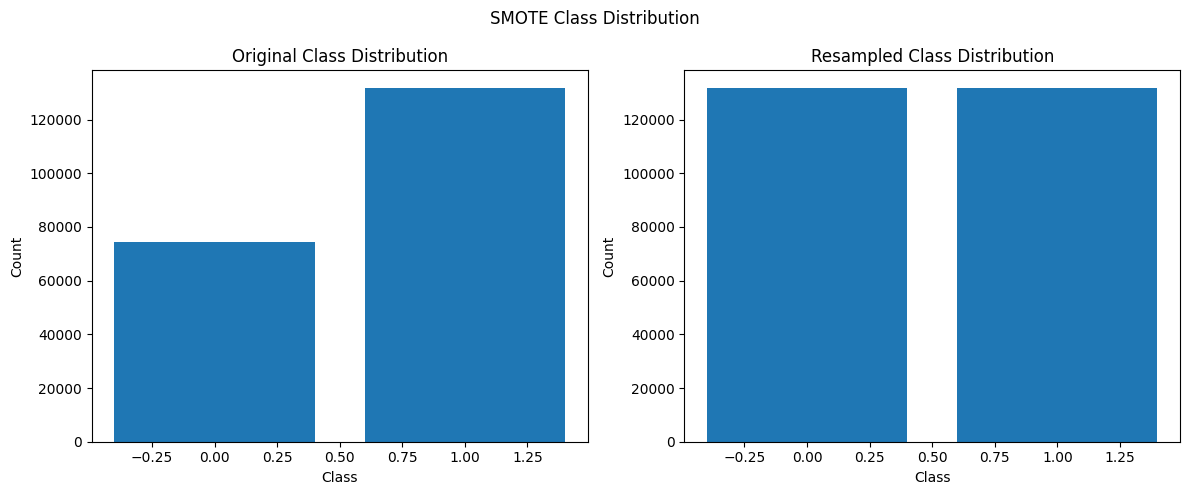

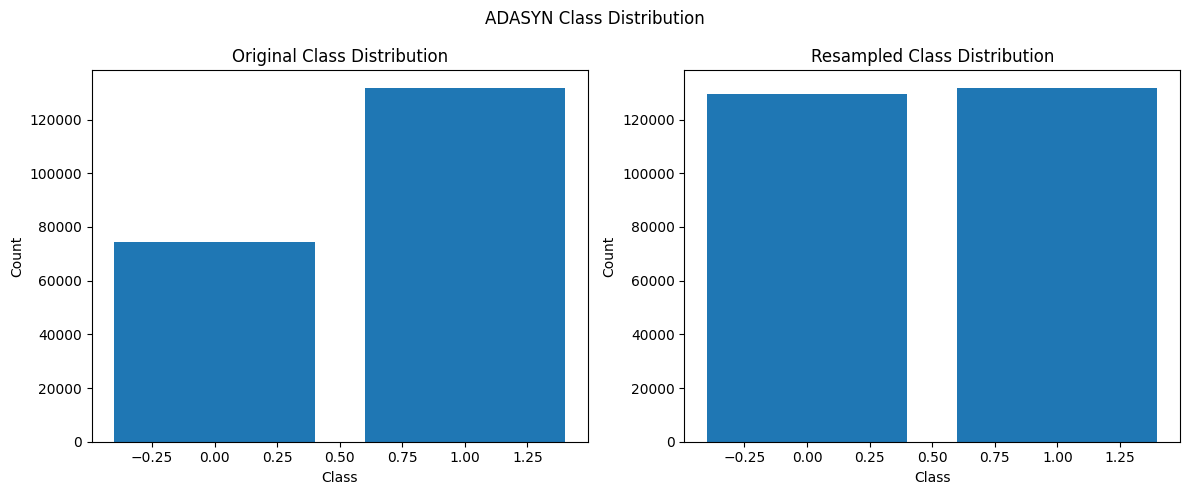

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step


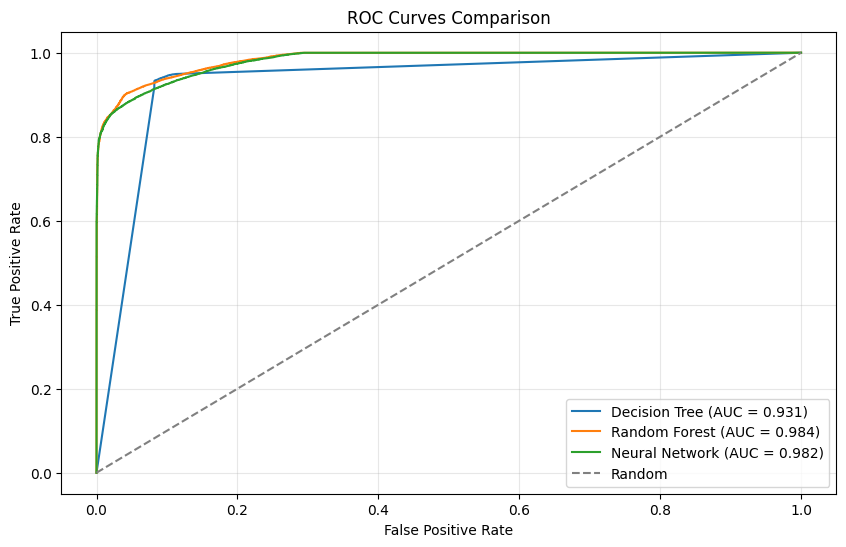

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step


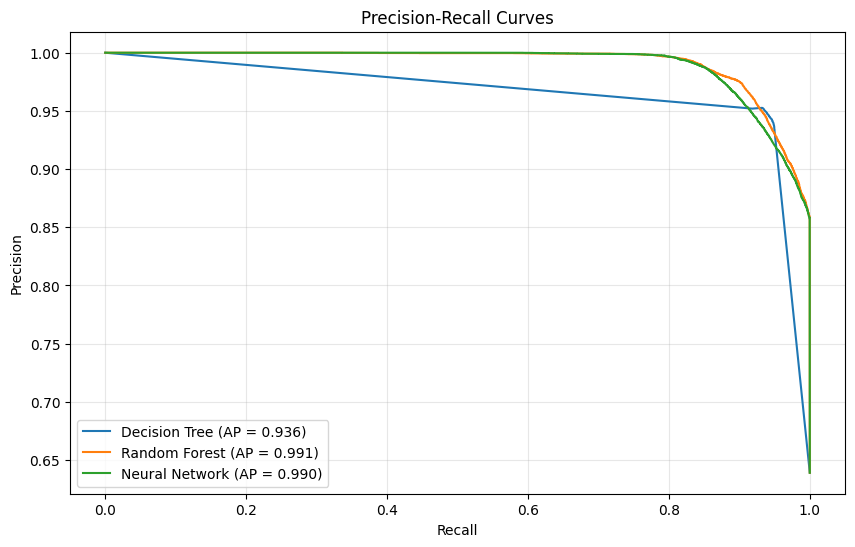

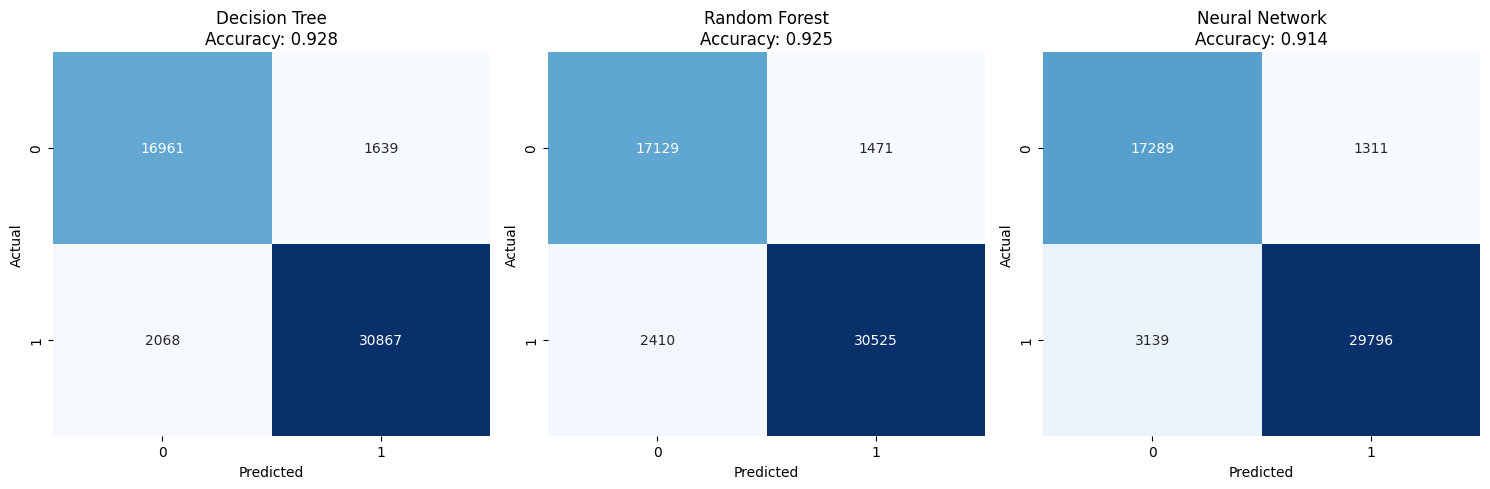

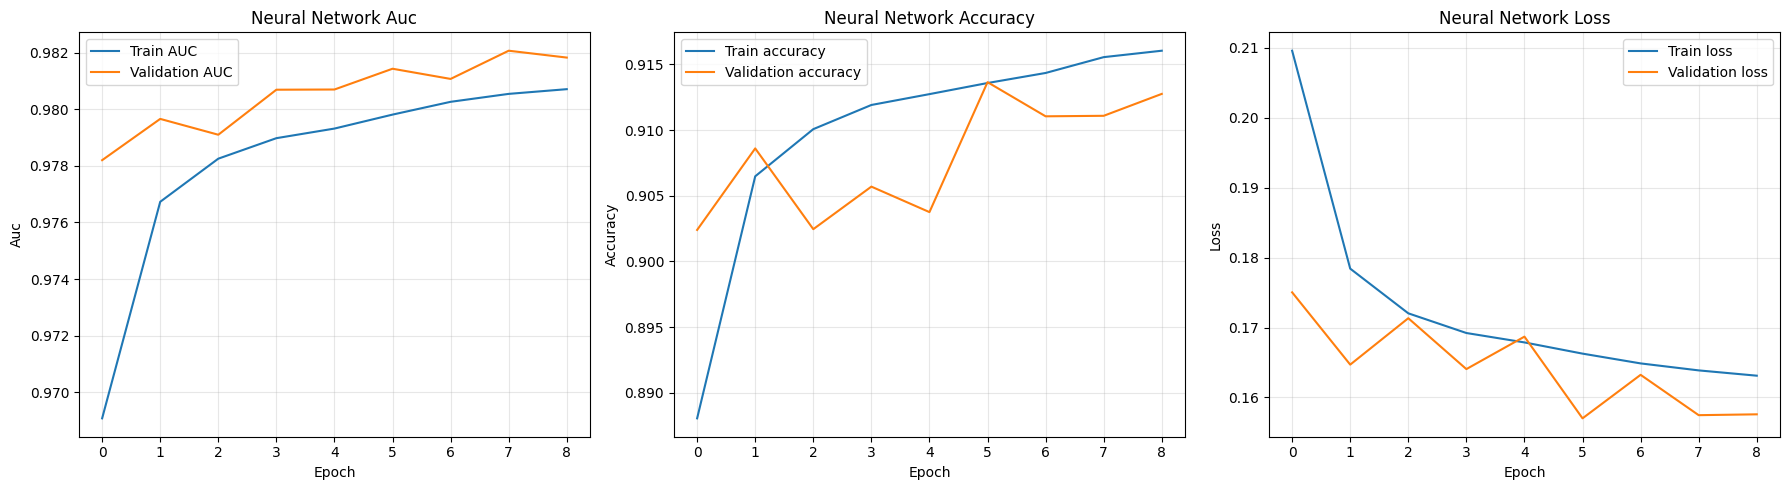


Metrics Comparison:
                Original_precision  Original_recall  Original_f1  \
Decision Tree             0.945570         0.942584     0.944074   
Random Forest             0.876415         0.991772     0.930532   
Neural Network            0.939088         0.933870     0.936471   

                Original_specificity  Original_accuracy  Original_auc_roc  \
Decision Tree               0.903925           0.928631          0.930179   
Random Forest               0.752366           0.905365          0.984382   
Neural Network              0.892742           0.919026          0.982592   

                Original_auc_pr  Original_cv_accuracy_mean  \
Decision Tree          0.934567                   0.927243   
Random Forest          0.991331                   0.906859   
Neural Network         0.990408                        NaN   

                Original_cv_accuracy_std  SMOTE_precision  ...  \
Decision Tree                   0.001266         0.952821  ...   
Random Forest   

In [ ]:
# Initialize classes
model_comparator = NetworkIntrusionModelComparator(random_state=42)
oversampler = Oversampling(random_state=42)

# First, preprocess your data using your existing method
X_train, X_test, y_train, y_test = model_comparator.preprocess_data(df)

# Apply SMOTE
X_train_smote, y_train_smote = oversampler.smote(X_train, y_train)

# Apply ADASYN
X_train_adasyn, y_train_adasyn = oversampler.adasyn(X_train, y_train)

# Train and evaluate with original data
model_comparator.X_train = X_train
model_comparator.y_train = y_train
model_comparator.train_models()
original_metrics = model_comparator.evaluate_models()

# Train and evaluate with SMOTE data
model_comparator.X_train = X_train_smote
model_comparator.y_train = y_train_smote
model_comparator.train_models()
smote_metrics = model_comparator.evaluate_models()

# Train and evaluate with ADASYN data
model_comparator.X_train = X_train_adasyn
model_comparator.y_train = y_train_adasyn
model_comparator.train_models()
adasyn_metrics = model_comparator.evaluate_models()

# Visualize results
# Class distribution plots
oversampler.plot_class_distribution(y_train, y_train_smote, "SMOTE Class Distribution")
plt.show()
oversampler.plot_class_distribution(y_train, y_train_adasyn, "ADASYN Class Distribution")
plt.show()

# Plot ROC curves and other metrics using your existing methods
model_comparator.plot_roc_curves()
plt.show()
model_comparator.plot_precision_recall_curves()
plt.show()
model_comparator.plot_confusion_matrices()
plt.show()
model_comparator.plot_learning_curves()
plt.show()

# Compare metrics from different approaches
comparison_df = pd.concat([
    original_metrics.add_prefix('Original_'),
    smote_metrics.add_prefix('SMOTE_'),
    adasyn_metrics.add_prefix('ADASYN_')
], axis=1)

print("\nMetrics Comparison:")
print(comparison_df)

## GAN

In [12]:
# def generate_synthetic_data_ctgan(original_data, target_column, num_synthetic_samples):
#     """
#     Generate synthetic data using CTGAN with metadata specification
#     """
#     # Preprocess categorical columns
#     categorical_cols = original_data.select_dtypes(include=['category']).columns
#     original_data = original_data.copy()
#     original_data[categorical_cols] = original_data[categorical_cols].astype('object')

#     # Separate features and target
#     X = original_data.drop(columns=[target_column])
#     y = original_data[target_column]

#     # Create metadata
#     metadata = SingleTableMetadata()
#     metadata.detect_from_dataframe(X)

#     # Configure CTGAN with metadata
#     ctgan = CTGANSynthesizer(
#         metadata=metadata,
#         epochs=50,
#         verbose=True
#     )

#     # Fit to data
#     ctgan.fit(X)

#     # Generate synthetic samples
#     synthetic_X = ctgan.sample(num_synthetic_samples)

#     # Add original labels
#     synthetic_y = y.sample(num_synthetic_samples, replace=True).reset_index(drop=True)

#     synthetic_data = pd.concat([synthetic_X, synthetic_y], axis=1)

#     return synthetic_data

In [17]:
# Preprocess original data
model_comparator = NetworkIntrusionModelComparator(random_state=42)
X_train, X_test, y_train, y_test = model_comparator.preprocess_data(df)

# Generate synthetic data using GAN
synthetic_result = model_comparator.main_synthetic_data_workflow(df)
synthetic_df = synthetic_result['synthetic_data']

# Preprocess synthetic data
synthetic_X, synthetic_y = synthetic_df.drop(columns=['label']), synthetic_df['label']
synthetic_X_processed = model_comparator.scaler.transform(synthetic_X)

# Train models on synthetic data
model_comparator.X_train = synthetic_X_processed
model_comparator.y_train = synthetic_y
model_comparator.train_models()

# Evaluate models on synthetic data
gan_metrics = model_comparator.evaluate_models()

# Plot distribution comparison
model_comparator.plot_distribution_comparison(df, synthetic_df)
plt.show()

# Compare metrics
print("\nMetrics Comparison:")
print(gan_metrics)

AttributeError: 'NetworkIntrusionModelComparator' object has no attribute 'copy'

In [ ]:
from tensorflow import keras

def save_model(model_comparator, method_name="Original"):
    """
    Save the neural network model from the model comparator.

    Args:
        model_comparator: NetworkIntrusionModelComparator instance
        method_name: String indicating which method's model to save (Original/SMOTE/ADASYN)
    """
    if "Neural Network" in model_comparator.results:
        nn_model = model_comparator.results["Neural Network"]["model"]
        filename = f"network_intrusion_{method_name.lower()}.keras"
        nn_model.save(filename)
        print(f"Model saved as {filename}")
        return filename
    else:
        print("No Neural Network model found in results")
        return None

def load_model(filename):
    """
    Load the saved neural network model.

    Args:
        filename: Name of the saved model file
    """
    return keras.models.load_model(filename)

# Save models for each method
original_model_file = save_model(model_comparator, "Original")
smote_model_file = save_model(model_comparator, "SMOTE")
adasyn_model_file = save_model(model_comparator, "ADASYN")

# Load the models
loaded_original_model = load_model(original_model_file)
loaded_smote_model = load_model(smote_model_file)
loaded_adasyn_model = load_model(adasyn_model_file)

# Verify the loaded models work
if loaded_original_model is not None:
    # Make predictions using the loaded original model
    original_predictions = loaded_original_model.predict(model_comparator.X_test)
    print("Original model loaded successfully!")

if loaded_smote_model is not None:
    # Make predictions using the loaded SMOTE model
    smote_predictions = loaded_smote_model.predict(model_comparator.X_test)
    print("SMOTE model loaded successfully!")

if loaded_adasyn_model is not None:
    # Make predictions using the loaded ADASYN model
    adasyn_predictions = loaded_adasyn_model.predict(model_comparator.X_test)
    print("ADASYN model loaded successfully!")

Model saved as network_intrusion_original.keras
Model saved as network_intrusion_smote.keras
Model saved as network_intrusion_adasyn.keras
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step
Original model loaded successfully!
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step
SMOTE model loaded successfully!
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step
ADASYN model loaded successfully!


In [ ]:
loaded_smote_model.evaluate(X_test, y_test, verbose=1)

1611/1611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9817 - accuracy: 0.9147 - loss: 0.1561


[0.15701547265052795, 0.9136509299278259, 0.9814387559890747]

In [ ]:
loss, accuracy, auc = loaded_adasyn_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")


1611/1611 - 3s - 2ms/step - AUC: 0.9817 - accuracy: 0.9132 - loss: 0.1562
Loss: 0.1561756730079651
Accuracy: 0.913165807723999
AUC: 0.9817498326301575
